In [1]:
import numpy as np
import math 
from matplotlib import pylab as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
s=[4,5]
a=s.copy()

Wanna shot or default press s or d? s

Continue shots y or n? y
4
-2.8124984595403837

Continue shots y or n? y
10
8.437506121469056

Continue shots y or n? n
4.0    10.0
[4.0, 10.0]
2.812503830964339
a= 4.0 	 toch`nost` y(1) use a= -2.8124984595403837
c= 7.0 	 toch`nost` y(1) use c= 2.812503830964339
b= 10.0 	 toch`nost` y(1) use b= 8.437506121469056



[4.0, 7.0]
2.68571197681311e-06
a= 4.0 	 toch`nost` y(1) use a= -2.8124984595403837
c= 5.5 	 toch`nost` y(1) use c= 2.68571197681311e-06
b= 7.0 	 toch`nost` y(1) use b= 2.812503830964339





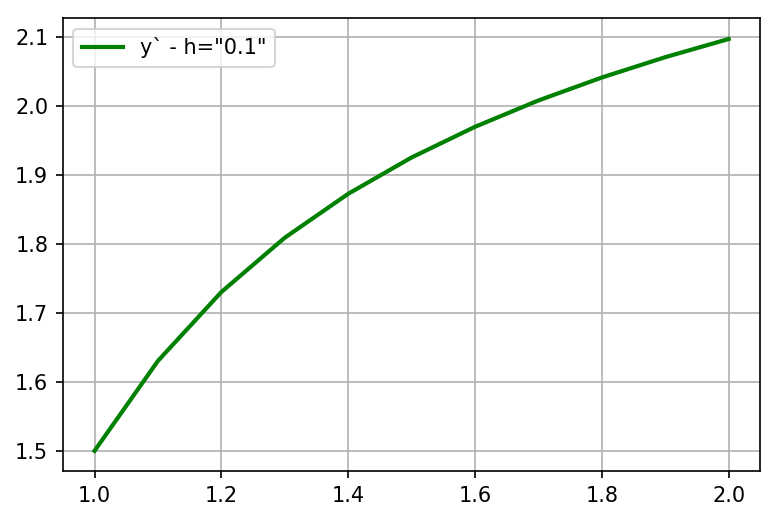

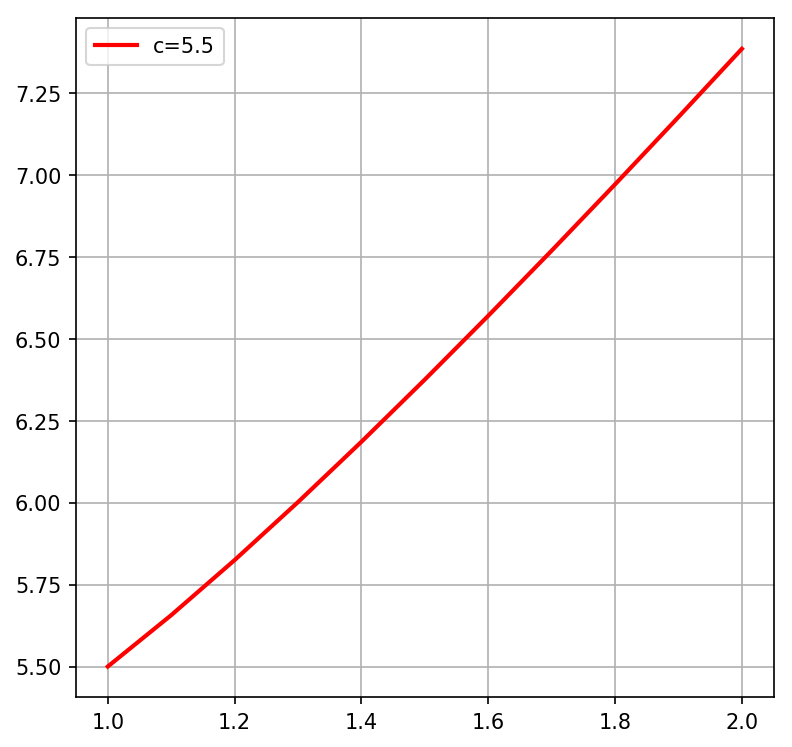

In [3]:
#import math 
#fig, ax = plt.subplots(figsize=(10,10))
rcParams['figure.dpi']=150

def f1(x,y,z): 
    return z 

def f2(x,y,z): 
    #return 3*z/2*x + 5*y/(x**2) + np.log([x])
    return (y + x + 1/x - z*(x + 2))*1/(x*(x + 1))
    
def lab4(xx,yy,zz,step,mode=1): 
    x=xx.copy()
    y=yy.copy()
    z=zz.copy()
    n=len(x) 
    #print(n) 
    s=0 
    e=n-1 
    if mode==-1: 
        s=-1 
        e=-n 

    for i in range(s,e,mode): 
        K1=[ step*f1(x[i], y[i], z[i]) , step*f2(x[i], y[i], z[i]) ] 
        K2=[ step*f1(x[i]+0.5*step, y[i]+0.5*K1[0], z[i]+0.5*K1[1]), step*f2(x[i]+0.5*step, y[i]+0.5*K1[0], z[i]+0.5*K1[1]) ] 
        K3=[ step*f1(x[i]+0.5*step, y[i]+0.5*K2[0], z[i]+0.5*K2[1]), step*f2(x[i]+0.5*step, y[i]+0.5*K2[0], z[i]+0.5*K2[1]) ] 
        K4=[ step*f1(x[i]+step, y[i]+K3[0], z[i]+K3[1] ), step*f2(x[i]+step, y[i]+K3[0], z[i]+K3[1] )] 
        delta=[1/6*( K1[0]+2*K2[0]+2*K3[0]+K4[0]),1/6*( K1[1]+2*K2[1]+2*K3[1]+K4[1])] 
        y[i+mode]=y[i]+delta[0] 
        z[i+mode]=z[i]+delta[1] 
        #if i==0: 
            # print(y) 
    #print(K_1,K_2,K_3,K_4,delta,'\n') 
    #print(x,'\n',y)
    return [y,z]

def shots(h):# тут настреливаем промежуток в котором будем искать у вручную, если пользователь хочет
    a=4
    b=8
    start=1 
    end=2 
    z0=3/2
    n=int((end-start)/h+1) 

    x1=[round(start+i*h,2) for i in range(n)] 
    y1=[0 for i in range(n)] 
    z1=[0 for i in range(n)] 
    z1[0]=z0
    while True:
        answer=input('Continue shots y or n? ')
        if answer=='y':
            y0=float(input())
            y1[0]=y0 
            yR1=lab4(x1,y1,z1,h)
            print(yslovie_ostanov(yR1))
            
            if (yslovie_ostanov(yR1))<0:
                a=y0
            else:
                b=y0
        else:
            print(a,'  ',b)
            return [a,b]
        print()  
    return [a,b]

def yslovie_ostanov(yR):
    return 4*yR[1][-1]+yR[0][-1]-13-4*np.log(2)
    
def proisv(x,y,y_shtr,step):
    #y_shtr2=[]
    #for i in range (len(x)):
        #y_shtr2.append(3*y_shtr[i]/2*x[i] + 5*y[i]/(x[i]**2) + np.log([x[i]]))
        
    #plt.plot(x,y_shtr2,'-',color='blue', linewidth=2,label='y`` - h="%s"'%(step))
    plt.plot(x,y_shtr,'-',color='green', linewidth=2,label='y` - h="%s"'%(step))
    plt.legend()
    plt.grid(True)
    plt.show()
    #return 3*y_shtr/2*x + 5*y/(x**2) + np.log([x])

def strelb(h):
    eps=0.001
    start=1 
    end=2 
    z0=3/2
    #z0=0
    
    answer=input('Wanna shot or default press s or d? ')
    print()
    if answer=='s':
        mass=shots(h)
        a=mass[0]
        b=mass[1]
    else:
        a=4
        b=8
        
    n=int((end-start)/h+1) 

    x1=[round(start+i*h,2) for i in range(n)] 
    y1=[0 for i in range(n)]
    y2=[0 for i in range(n)]
    y3=[0 for i in range(n)] 
    z1=[0 for i in range(n)] 
    z1[0]=z0
    
    delta=1 
    counter = 1
    middle_step=0
    while abs(delta)>eps and counter<=15:
        print([a,b])
        
        c=(a+b)/2
        middle_step=c
        counter+=1
        y1[0]=a
        y2[0]=c
        y3[0]=b
        yR1=lab4(x1,y1,z1,h)
        yR2=lab4(x1,y2,z1,h)
        yR3=lab4(x1,y3,z1,h)
        
        delta=yslovie_ostanov(yR2)
        
        print(delta)
        print('a=',a,'\t toch`nost` y(1) use a=',yslovie_ostanov(yR1))
        print('c=',c,'\t toch`nost` y(1) use c=',yslovie_ostanov(yR2))
        print('b=',b,'\t toch`nost` y(1) use b=',yslovie_ostanov(yR3))
        print('\n\n')
        
        if yslovie_ostanov(yR1)*yslovie_ostanov(yR2)<0:
            b=c
        else:
            a=c 
        
    
    y_middle_step=[0 for i in range(n)]
    y_middle_step[0]=middle_step
    yR1=lab4(x1,y_middle_step,z1,h)
    proisv(x1,yR1[0],yR1[1],h)
    
    fig = plt.figure(figsize=(6,6)) 
    plt.plot(x1,yR1[0],'-',color='red', linewidth=2,label='c=%s'%middle_step)
    #plt.scatter(x1,y1,color='red', linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
h1=0.1 
h2=0.01 
strelb(h1)


In [5]:
#import math 
#fig, ax = plt.subplots(figsize=(10,10))
rcParams['figure.dpi']=150

def f1(x,y,z): 
    return z 

def f2(x,y,z): 
    #return 3*z/2*x + 5*y/(x**2) + np.log([x])
    #return (y + x + 1/x - z*(x + 2))*1/(x*(x + 1))
    return 2*y/(x**2+1)
    
def lab4(x,y,z,step,mode=1): 
    n=len(x) 
    #print(n) 
    s=0 
    e=n-1 
    if mode==-1: 
        s=-1 
        e=-n 

    for i in range(s,e,mode): 
        K1=[ step*f1(x[i], y[i], z[i]) , step*f2(x[i], y[i], z[i]) ] 
        K2=[ step*f1(x[i]+0.5*step, y[i]+0.5*K1[0], z[i]+0.5*K1[1]), step*f2(x[i]+0.5*step, y[i]+0.5*K1[0], z[i]+0.5*K1[1]) ] 
        K3=[ step*f1(x[i]+0.5*step, y[i]+0.5*K2[0], z[i]+0.5*K2[1]), step*f2(x[i]+0.5*step, y[i]+0.5*K2[0], z[i]+0.5*K2[1]) ] 
        K4=[ step*f1(x[i]+step, y[i]+K3[0], z[i]+K3[1] ), step*f2(x[i]+step, y[i]+K3[0], z[i]+K3[1] )] 
        delta=[1/6*( K1[0]+2*K2[0]+2*K3[0]+K4[0]),1/6*( K1[1]+2*K2[1]+2*K3[1]+K4[1])] 
        y[i+mode]=y[i]+delta[0] 
        z[i+mode]=z[i]+delta[1] 
        #if i==0: 
            # print(y) 
    #print(K_1,K_2,K_3,K_4,delta,'\n') 
    #print(x,'\n',y)
    return [y,z]

def shots(h):# тут настреливаем промежуток в котором будем искать у вручную, если пользователь хочет
    a=4
    b=8
    start=1 
    end=2 
    z0=3/2
    n=int((end-start)/h+1) 

    x1=[round(start+i*h,2) for i in range(n)] 
    y1=[0 for i in range(n)] 
    z1=[0 for i in range(n)] 
    z1[0]=z0
    while True:
        answer=input('Continue shots y or n? ')
        if answer=='y':
            y0=float(input())
            y1[0]=y0 
            yR1=lab4(x1,y1,z1,h)
            print(4*yR1[1][-1]+yR1[0][-1]-13-4*np.log(2))
            print(yslovie_ostanov(yR1))
            
            if (yslovie_ostanov(yR1))<0:
                a=y0
            else:
                b=y0
        else:
            print(a,'  ',b)
            return [a,b]
        print()  
    return [a,b]

def yslovie_ostanov(yR):
    return 4*yR[1][-1]+yR[0][-1]-13-4*np.log(2)

def strelb(h):
    eps=0.001
    start=1 
    end=2 
    z0=3/2
    
    answer=input('Wanna shot or default press s or d? ')
    print()
    if answer=='s':
        mass=shots(h)
        a=mass[0]
        b=mass[1]
    else:
        a=4
        b=8
        
    n=int((end-start)/h+1) 

    x1=[round(start+i*h,2) for i in range(n)] 
    y1=[0 for i in range(n)]
    y2=[0 for i in range(n)]
    #p3=[0 for i in range(n)] 
    z1=[0 for i in range(n)] 
    z1[0]=z0
    
    delta=1 
    counter = 1
    while abs(delta)>eps and counter<=15:
        print([a,b])
        
        c=(a+b)/2
        counter+=1
        y1[0]=a
        y2[0]=c
        #p3[0]=b
        yR1=lab4(x1,y1,z1,h)
        yR2=lab4(x1,y2,z1,h)
        #pR3=lab4(x1,p3,z1,h)
        
        delta=yslovie_ostanov(yR2)
        
        print(delta)

        print('a=',a,'\t toch`nost` y(2) use a=',yslovie_ostanov(yR1))
        print('c=',c,'\t toch`nost` y(2) use c=',yslovie_ostanov(yR2))
        #print('b=',b,'\t toch`nost` y(2) use b=',yslovie_ostanov(pR3))
        print('\n\n')
        
        if yslovie_ostanov(yR1)*yslovie_ostanov(yR2)<0:
            b=c
        else:
            a=c 
        
    
    
h1=0.1 
h2=0.01 
strelb(h1)


Wanna shot or default press s or d? d

[4, 8]
19.071988989261484
a= 4 	 toch`nost` y(2) use a= 16.289493245618438
c= 6.0 	 toch`nost` y(2) use c= 19.071988989261484



[6.0, 8]
23.3152292238576
a= 6.0 	 toch`nost` y(2) use a= 21.923981352036073
c= 7.0 	 toch`nost` y(2) use c= 23.3152292238576



[7.0, 8]
25.436849341155657
a= 7.0 	 toch`nost` y(2) use a= 24.741225405244897
c= 7.5 	 toch`nost` y(2) use c= 25.436849341155657



[7.5, 8]
26.49765939980469
a= 7.5 	 toch`nost` y(2) use a= 26.14984743184931
c= 7.75 	 toch`nost` y(2) use c= 26.49765939980469



[7.75, 8]
27.028064429129216
a= 7.75 	 toch`nost` y(2) use a= 26.85415844515152
c= 7.875 	 toch`nost` y(2) use c= 27.028064429129216



[7.875, 8]
27.29326694379146
a= 7.875 	 toch`nost` y(2) use a= 27.20631395180262
c= 7.9375 	 toch`nost` y(2) use c= 27.29326694379146



[7.9375, 8]
27.425868201122604
a= 7.9375 	 toch`nost` y(2) use a= 27.382391705128178
c= 7.96875 	 toch`nost` y(2) use c= 27.425868201122604



[7.96875, 8]
27.4921688